#**PCA Assignment**



#Task 1: Exploratory Data Analysis (EDA):
- Load the dataset and perform basic data exploration.
- Examine the distribution of features using histograms, box plots, or density plots.
- Investigate correlations between features to understand relationships within the data.

#Task 2: Dimensionality Reduction with PCA:
- Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
- Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
- Transform the original dataset into the principal components.

#Task 3: Clustering with Original Data:
- Apply a clustering algorithm (e.g., K-means) to the original dataset.
- Visualize the clustering results using appropriate plots.
- Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

#Task 4: Clustering with PCA Data:
- Apply the same clustering algorithm to the PCA-transformed dataset.
Visualize the clustering results obtained from PCA-transformed data.
- Compare the clustering results from PCA-transformed data with those from the original dataset.

#Task 5: Comparison and Analysis:
- Compare the clustering results obtained from the original dataset and PCA-transformed data.
- Discuss any similarities or differences observed in the clustering results.
- Reflect on the impact of dimensionality reduction on clustering performance.
- Analyze the trade-offs between using PCA and clustering directly on the original dataset.

#Task 6: Conclusion and Insights
- Summarize the key findings and insights from the assignment.
- Discuss the practical implications of using PCA and clustering in data analysis.
- Provide recommendations for when to use each technique based on the analysis conducted.



**Target Variable**

Type:
This is likely the target variable, as it typically represents the class or category of the wine (e.g., wine type or wine quality).

**Independent Variables**
The rest of the features are the independent variables.
These include:
1. Alcohol
2. Malic Acid
3. Ash
4. Alcalinity
5. Magnesium
6. Phenols
7. Flavanoids
8. Nonflavanoids
9. Proanthocyanins
10. Color Intensity
11. Hue
12. Dilution
13. Proline

In [57]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score


In [4]:
# Load the dataset
file_path = r'/content/wine.csv'
wine_data = pd.read_csv(file_path)

In [5]:
wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [6]:
wine_data.tail()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
173           0.52             1.06    7.7  0.64      1.74      740  
174           0.43             1.41    7.3  0.70      1.56      750  
175           0.43             1.35   10.2  0.59      1.56      835  
176           0.53             1.46    9.3  0.60      1.62      840  
177           0.56             1.35    9.2  0.61      1.60      560

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
#Summary Statistics
wine_data.describe()

Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.124453         0.572359    2.318286   
min      0.980000    0.340000       0.130000         0.410000    1.280000   
25%      1.742500    1.205000       0.270000         1.250000    3.220000   
50%      2.355000    2.135000       0.340000         1.555000    4.690000   
75%      2.800000    2.875000       0.437500         1.950000    6.200000   
max      3.880000    5.080000       0.660000         3.580000   13.000000   

              Hue    Dilution      Proline  
count  178.000000  178.000000   178.000000  
mean     0.957449    2.611685   746.893258  
std      0.228572    0.709990   314.907474  
min      0.480000    1.270000   278.000000  
25%      0.782500    1.937500   500.500000  
50%      0.965000    2.780000   673.500000  
75%      1.120000    3.170000   985.000000  
max      1.710000    4.000000  1680.000000

In [9]:
#Check missing values
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

**No missing values.**


In [10]:
wine_data.shape

(178, 14)

In [11]:
wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [12]:
#To know unique values
wine_data.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [13]:
#Typecast to category
wine_data['Type'] = wine_data['Type'].astype('category')

In [14]:
#To check datatypes
wine_data.dtypes


Type               category
Alcohol             float64
Malic               float64
Ash                 float64
Alcalinity          float64
Magnesium             int64
Phenols             float64
Flavanoids          float64
Nonflavanoids       float64
Proanthocyanins     float64
Color               float64
Hue                 float64
Dilution            float64
Proline               int64
dtype: object

In [15]:
wine_data['Type'].value_counts()

Type
2    71
1    59
3    48
Name: count, dtype: int64

<ipython-input-16-1b227011ff1f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=wine_data, palette='Set3')


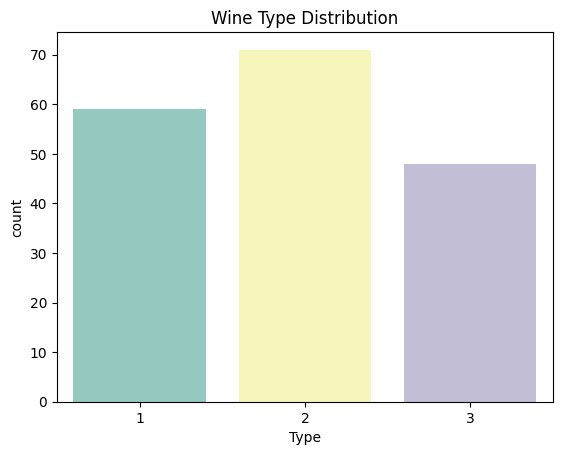

In [16]:
#Univariate categorical column
sns.countplot(x='Type', data=wine_data, palette='Set3')
plt.title('Wine Type Distribution')
plt.show()

**Here Type 2 category of wine type is most common and Type 3 is least common in the dataset**
- **Type 1** has the highest count, around 60.
- **Type 2** follows with a count close to 50.
- **Type 3** has the lowest count, approximately in the mid-40s.


In [17]:
#categorical column
sns.boxplot(x='Type', data=wine_data)
plt.title('Wine Type')
plt.show()

**No outliers**

In [18]:
#Univariate numerical variables
#numerical columns
wine_numerical_cls = wine_data.select_dtypes(include = ['int64','float64'])
wine_numerical_cls.dtypes


Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [19]:
for col in wine_numerical_cls.columns:
      print("range of {}{}{}{}{}{}{}{}".format(col,":"," ","[",wine_numerical_cls[col].min(), ", ",wine_numerical_cls[col].max(),"]"))

range of Alcohol: [11.03, 14.83]
range of Malic: [0.74, 5.8]
range of Ash: [1.36, 3.23]
range of Alcalinity: [10.6, 30.0]
range of Magnesium: [70, 162]
range of Phenols: [0.98, 3.88]
range of Flavanoids: [0.34, 5.08]
range of Nonflavanoids: [0.13, 0.66]
range of Proanthocyanins: [0.41, 3.58]
range of Color: [1.28, 13.0]
range of Hue: [0.48, 1.71]
range of Dilution: [1.27, 4.0]
range of Proline: [278, 1680]


In [20]:
for col in wine_numerical_cls.columns:
      print("Standard deviation and varince of {}{}{}{}{}{}{}{}".format(col,":"," ","[",wine_numerical_cls[col].std(), ", ",wine_numerical_cls[col].var(),"]"))

Standard deviation and varince of Alcohol: [0.8118265380058575, 0.6590623278105759]
Standard deviation and varince of Malic: [1.1171460976144627, 1.2480154034152224]
Standard deviation and varince of Ash: [0.27434400906081485, 0.07526463530756046]
Standard deviation and varince of Alcalinity: [3.339563767173505, 11.152686155018092]
Standard deviation and varince of Magnesium: [14.282483515295665, 203.98933536469244]
Standard deviation and varince of Phenols: [0.6258510488339893, 0.39168953532660455]
Standard deviation and varince of Flavanoids: [0.9988586850169467, 0.997718672633784]
Standard deviation and varince of Nonflavanoids: [0.12445334029667937, 0.015488633911001078]
Standard deviation and varince of Proanthocyanins: [0.5723588626747613, 0.32759466768234624]
Standard deviation and varince of Color: [2.318285871822413, 5.374449383491404]
Standard deviation and varince of Hue: [0.22857156582982338, 0.052244960705897285]
Standard deviation and varince of Dilution: [0.7099904287650

In [21]:
for col in wine_numerical_cls.columns:
      print("Kurtosis and Skewness of {}{}{}{}{}{}{}{}".format(col,":"," ","[",wine_numerical_cls[col].kurt(), ", ",wine_numerical_cls[col].skew(),"]"))

Kurtosis and Skewness of Alcohol: [-0.8524995684849164, -0.051482331077134784]
Kurtosis and Skewness of Malic: [0.2992066798717512, 1.0396511925814442]
Kurtosis and Skewness of Ash: [1.1439781688330677, -0.17669931645735712]
Kurtosis and Skewness of Alcalinity: [0.4879415404679124, 0.21304688642645586]
Kurtosis and Skewness of Magnesium: [2.1049913235905557, 1.098191054755161]
Kurtosis and Skewness of Phenols: [-0.8356265233980293, 0.08663858640245253]
Kurtosis and Skewness of Flavanoids: [-0.8803815472453591, 0.02534355338149103]
Kurtosis and Skewness of Nonflavanoids: [-0.6371910641424079, 0.4501513355621236]
Kurtosis and Skewness of Proanthocyanins: [0.5546485226011098, 0.5171371722998975]
Kurtosis and Skewness of Color: [0.38152227277478135, 0.8685847909572548]
Kurtosis and Skewness of Hue: [-0.3440957413614769, 0.021091272199709302]
Kurtosis and Skewness of Dilution: [-1.0864345274098695, -0.30728549895848106]
Kurtosis and Skewness of Proline: [-0.24840310614613248, 0.767821781389

In [22]:
#outliers present
outliers = {}

for col in wine_numerical_cls.columns:
    Q1 = np.quantile(wine_numerical_cls[col], 0.25)
    Q3 = np.quantile(wine_numerical_cls[col], 0.75)
    IQR = (Q3 - Q1)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = wine_numerical_cls[(wine_numerical_cls[col] < lower_bound) | (wine_numerical_cls[col] > upper_bound)][col]

# Print the outliers
for col, values in outliers.items():
    if not values.empty:
        print(f"Outliers in {col}:\n{values}\n")
    else:
        print(f"No outliers in {col}\n")

No outliers in Alcohol

Outliers in Malic:
123    5.80
137    5.51
173    5.65
Name: Malic, dtype: float64

Outliers in Ash:
25     3.22
59     1.36
121    3.23
Name: Ash, dtype: float64

Outliers in Alcalinity:
59     10.6
73     30.0
121    28.5
127    28.5
Name: Alcalinity, dtype: float64

Outliers in Magnesium:
69    151
73    139
78    136
95    162
Name: Magnesium, dtype: int64

No outliers in Phenols

No outliers in Flavanoids

No outliers in Nonflavanoids

Outliers in Proanthocyanins:
95     3.28
110    3.58
Name: Proanthocyanins, dtype: float64

Outliers in Color:
151    10.80
158    13.00
159    11.75
166    10.68
Name: Color, dtype: float64

Outliers in Hue:
115    1.71
Name: Hue, dtype: float64

No outliers in Dilution

No outliers in Proline



In [36]:
# Outlier detection and handling
def detect_outliers(df):
    outliers_indices = []
    for col in df.select_dtypes(include='number').columns: # Select only numerical columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outliers_indices.extend(outliers_list_col)
    outliers_indices = list(set(outliers_indices))
    return outliers_indices

# Call the function to get outlier indices
outliers_indices = detect_outliers(wine_data)  # Pass your DataFrame to the function

# Remove outliers
wine_data_no_outliers = wine_data.drop(outliers_indices)
print(f"Shape after outlier removal: {wine_data_no_outliers.shape}")

Shape after outlier removal: (161, 14)


In [38]:
# Impute outliers in the original data
wine_data_imputed = wine_data.copy()
for col in wine_data.select_dtypes(include='number').columns: # Select only numerical columns
    Q1 = wine_data[col].quantile(0.25)
    Q3 = wine_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outliers = wine_data[(wine_data[col] < Q1 - outlier_step) | (wine_data[col] > Q3 + outlier_step)].index
    wine_data_imputed.loc[outliers, col] = wine_data[col].median()

In [40]:
# Convert categorical columns to numerical if necessary
for col in wine_data_no_outliers.select_dtypes(include='category').columns:
    wine_data_no_outliers[col] = wine_data_no_outliers[col].cat.codes  # Convert to numerical codes

# Log transformation for skewed columns
skewness = wine_data_no_outliers.skew().sort_values(ascending=False)
print("Skewness of columns:\n", skewness)

Skewness of columns:
 Malic              0.893988
Proline            0.697792
Color              0.623476
Nonflavanoids      0.518631
Magnesium          0.498408
Proanthocyanins    0.329645
Type               0.177087
Phenols            0.082184
Alcalinity         0.032577
Alcohol           -0.031847
Flavanoids        -0.131770
Hue               -0.140952
Ash               -0.215661
Dilution          -0.360417
dtype: float64


In [41]:
# Log transform skewed features (absolute skewness > 0.5)
log_transform_cols = skewness[abs(skewness) > 0.5].index
wine_data_log_transformed = wine_data_no_outliers.copy()
wine_data_log_transformed[log_transform_cols] = np.log1p(wine_data_log_transformed[log_transform_cols])

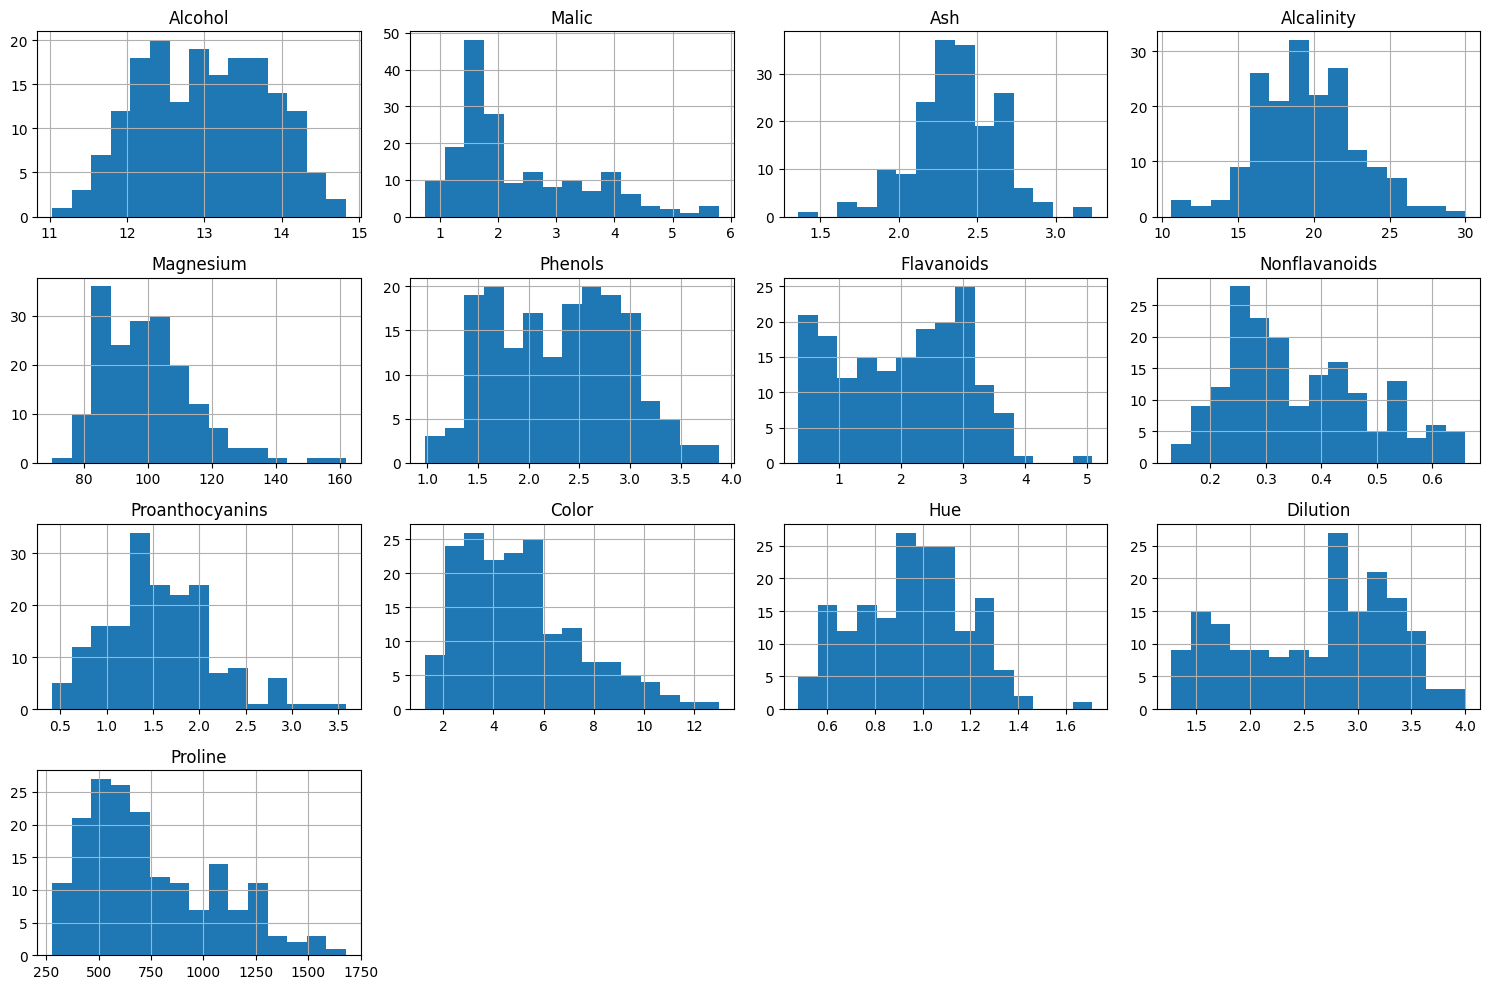

In [66]:
# Histograms
wine_data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

**1. Alcohol**
- Distribution: Bimodal with peaks around 12.5 and 13.5.
- Range: 11 to 15.
- Insights: Most wines have alcohol content between 12 and 14, with fewer wines having alcohol content lower than 12 or higher than 14.

**2. Malic Acid**
- Distribution: Right-skewed with a peak around 1.5.
- Range: 1 to 6.
- Insights: Majority of wines have malic acid content between 1 and 3, with fewer wines having higher malic acid content.

**3. Ash**
- Distribution: Bimodal with peaks around 2.3 and 2.8.
- Range: 1.5 to 3.
- Insights: Most wines have ash content between 2 and 2.8, with fewer wines having ash content lower than 2 or higher than 2.8.

**4. Alcalinity**
- Distribution: Multimodal with peaks around 15, 18, and 22.
- Range: 10 to 30.
- Insights: There is a wide range of alcalinity, but most wines have alcalinity between 15 and 25.

**5. Magnesium**
- Distribution: Right-skewed with a peak around 100.
- Range: 70 to 160.
- Insights: Most wines have magnesium content between 80 and 120, with fewer wines having higher magnesium content.

**6. Phenols**
- Distribution: Approximately uniform with a slight peak around 2.5.
- Range: 1 to 4.
- Insights: Phenol content is fairly evenly distributed between 1.5 and 3.5.

**7. Flavanoids**
- Distribution: Bimodal with peaks around 1.5 and 3.
- Range: 0.5 to 5.
- Insights: Flavanoid content varies widely, with most wines having content between 1 and 4.

**8. Nonflavanoids**
- Distribution: Right-skewed with a peak around 0.3.
- Range: 0.1 to 0.6.
- Insights: Most wines have nonflavanoid phenol content between 0.2 and 0.4.

**9. Proanthocyanins**
- Distribution: Bimodal with peaks around 1 and 2.
- Range: 0.5 to 3.5.
- Insights: Proanthocyanin content is widely varied, with most wines having content between 1 and 3.

**10. Color Intensity**
- Distribution: Right-skewed with a peak around 3.
- Range: 2 to 12.
- Insights: Most wines have color intensity between 2 and 6.

**11. Hue**
- Distribution: Approximately uniform with peaks around 1 and 1.5.
Range: 0.6 to 1.6.
- Insights: Hue values are fairly evenly distributed between 0.7 and 1.5

**12. Dilution**
- Distribution: Right-skewed with a peak around 3.
- Range: 1.5 to 4.
- Insights: Most wines have dilution values between 2 and 3.5.

**13. Proline**
- Distribution: Right-skewed with a peak around 500.
- Range: 250 to 1750.
- Insights: Proline content varies widely, with most wines having content between 250 and 1000.

In [67]:
# Box plots
wine_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

- **Alcohol:** Median around 13, range between 11 and 15, with a few outliers.
- **Malic Acid:** Median around 2, range between 1 and 6, with several outliers.
- **Ash:** Median around 2.5, range between 1.5 and 3.0, with a few outliers.
- **Alcalinity:** Median around 20, range between 10 and 30, with some outliers.
- **Magnesium:** Median around 100, range between 80 and 160, with some outliers.
- **Phenols:** Median around 2.5, range between 1 and 4, with no outliers.
- **Flavanoids:** Median around 2, range between 0.5 and 3.5, with some outliers.
- **Nonflavanoid Phenols:** Median around 0.3, range between 0.2 and 0.6, with no outliers.
- **Proanthocyanins:** Median around 1.5, range between 0.5 and 3.5, with some outliers.
- **Color Intensity:** Median around 4, range between 2 and 12, with some outliers.
- **Hue:** Median around 1, range between 0.6 and 1.6, with some outliers.
- **Dilution:** Median around 2.5, range between 1.5 and 4, with no outliers.
- **Proline:** Median around 500, range between 250 and 1750, with no outliers.

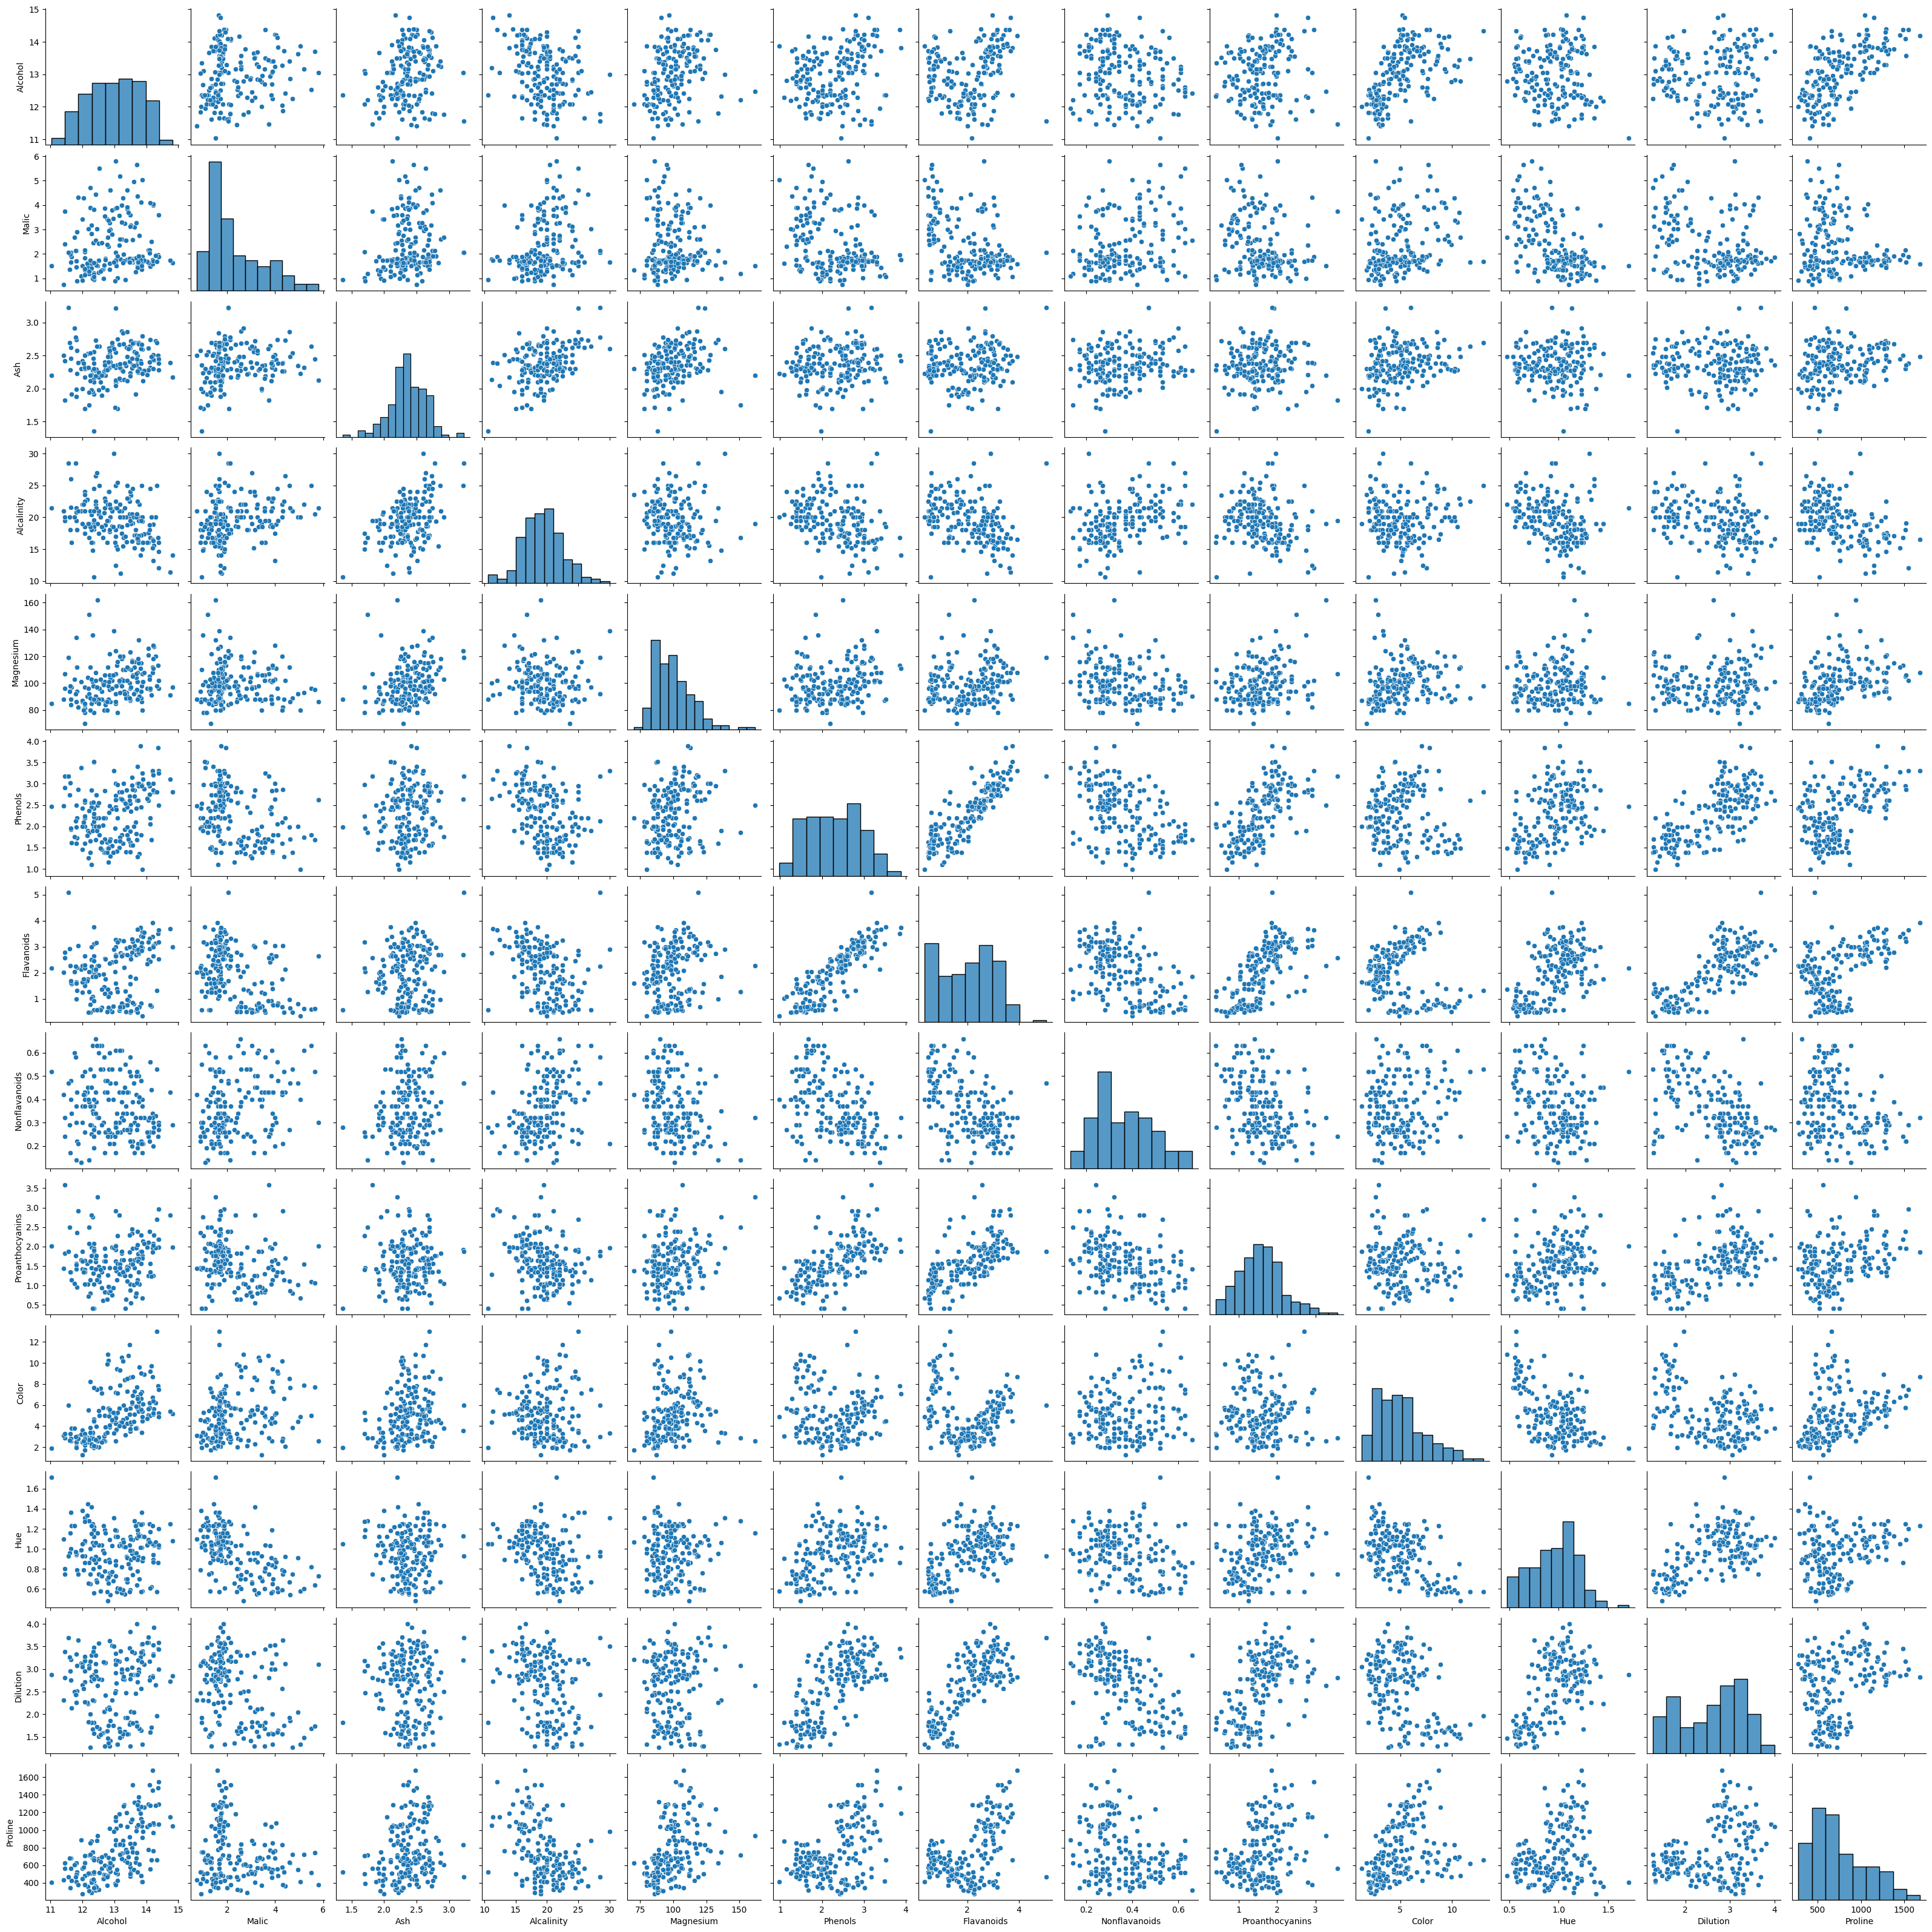

In [65]:
# Pairplot for detailed feature relationships
sns.pairplot(wine_data)
plt.show()

- **Phenols and Flavanoids:** Strongly positively correlated, indicating that higher phenol content is associated with higher flavonoid content.
- **Dilution and Proline:** Both positively correlate with phenols and flavonoids, suggesting that these compounds are related to the dilution and proline levels in wine.
- **Alcalinity and Malic Acid:** Positively correlated, suggesting wines with higher malic acid tend to have higher alcalinity.
- **Alcohol:** Negatively correlated with several acids and positively correlated with proline, suggesting a trade-off between alcohol content and certain acid levels.

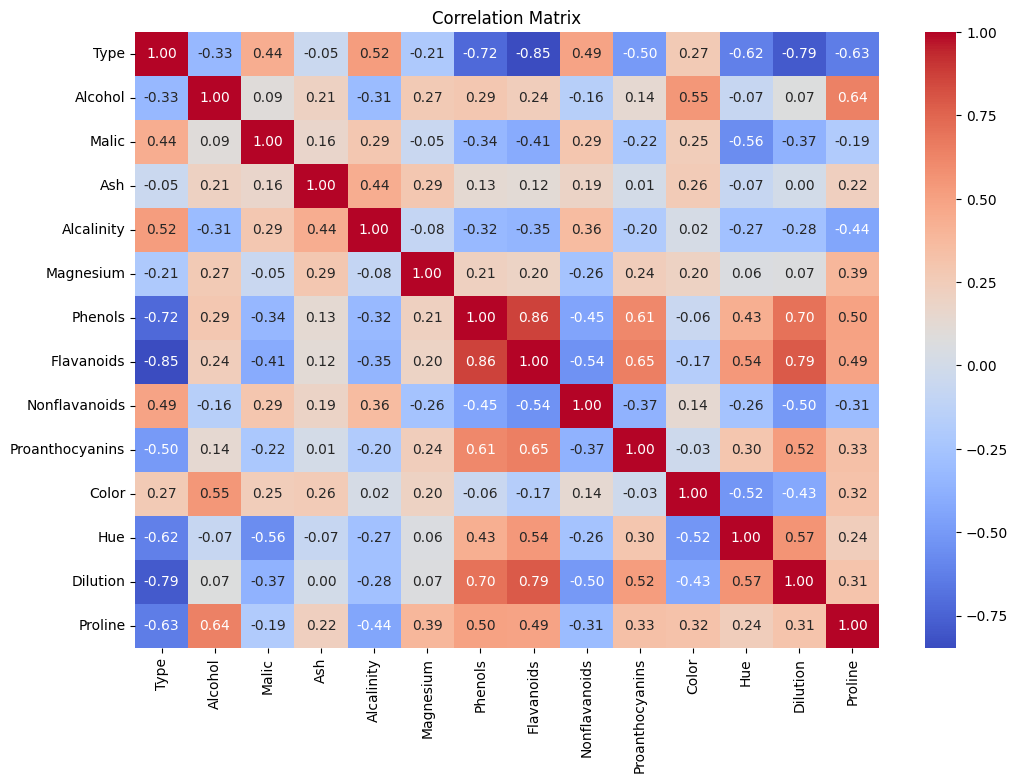

In [64]:
# Correlation matrix
correlation_matrix = wine_data.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

1. Alcohol:
- Alcohol has a negative correlation with malic acid, alcalinity, and hue.
- Positive correlation with phenols, flavonoids, dilution, and proline.
2. Malic Acid:
- Shows a negative correlation with phenols, flavonoids, and dilution.
- Positive correlation with alcalinity and color intensity.
3. Ash:
- Does not show strong correlations with other features.
- Slight positive correlation with alcalinity and color intensity.
4. Alcalinity:
- Positively correlated with malic acid and color intensity.
- Negatively correlated with phenols, flavonoids, and dilution.
5. Magnesium:
- Weakly correlated with most other features.
- Slight positive correlation with phenols and proline.
6. Phenols:
- Strong positive correlation with flavonoids.
- Moderate positive correlation with dilution and proline.
- Negative correlation with malic acid, alcalinity, and nonflavonoids.
7. Flavanoids:
- Strong positive correlation with phenols.
- Moderate positive correlation with dilution and proline.
- Negative correlation with malic acid, alcalinity, and nonflavonoids.
8. Nonflavanoids:
- Negative correlation with phenols, flavonoids, and dilution.
- Positive correlation with alcalinity and color intensity.
9. Proanthocyanins:
- Moderately positive correlation with phenols, flavonoids, and dilution.
- Slight negative correlation with color intensity and nonflavonoids.
10. Color Intensity:
- Positive correlation with malic acid and alcalinity.
- Negative correlation with phenols, flavonoids, and dilution.
11. Hue:
- Negative correlation with malic acid, alcalinity, and color intensity.
- Positive correlation with phenols, flavonoids, and dilution.
12. Dilution:
- Strong positive correlation with phenols and flavonoids.
- Negative correlation with malic acid, alcalinity, and color intensity.
13. Proline:
- Positive correlation with alcohol, phenols, flavonoids, and dilution.
- Negative correlation with alcalinity.

- **Type:** Flavanoids, Phenols, and Proline are significant differentiators for the type of wine.
- **Flavanoids and Phenols:** Strongly correlated, indicating they may be related in the winemaking process or grape composition.
-**Proline:** Positively correlated with many key compounds, suggesting it may play a role in the overall composition and quality of the wine.
- **Alcohol:** Correlated with Proline and Color, suggesting its impact on the wine's physical and sensory properties.

# Task 2: Dimensionality Reduction with PCA

In [42]:
# Standardize the features
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_data_log_transformed)


In [43]:
# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(wine_data_scaled)

In [44]:
# Scree plot
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

**Explained Variance Drop:**
- The first principal component accounts for a significant amount of variance, around 0.4 (40%).
- The second principal component adds another substantial amount, around 0.2 (20%).
- After the second component, the explained variance drops significantly and levels off.

**Elbow Point:**
- The "elbow" of the plot, where the explained variance starts to level off, is typically used to determine the optimal number of components.
- In this plot, the elbow is around the third or fourth component.

**Cumulative Explained Variance:**
- From the cumulative explained variance (not shown in the scree plot but previously calculated), we can determine how many components are needed to reach a desired level of explained variance, such as 95%.
- Given the scree plot, it would be reasonable to choose the first 3 to 4 principal components as they capture the majority of the variance in the data.

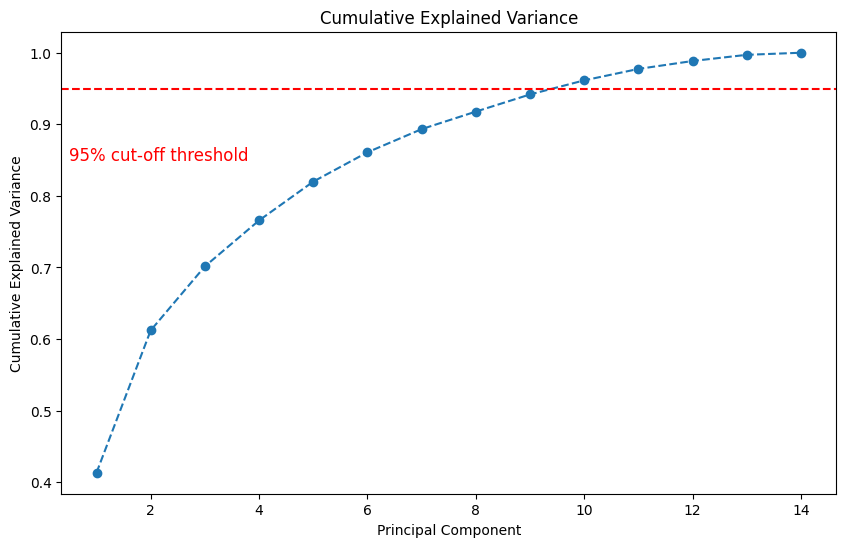

In [45]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=12)
plt.show()

The cumulative explained variance plot provides a clearer view of how many principal components are required to cover a certain percentage of the variance in the data. The red dashed line represents the 95% cut-off threshold.

From the plot, we can observe the following:

**Cumulative Variance:**
- The first few principal components capture a large portion of the variance.
- The cumulative explained variance increases rapidly with the first few components and then starts to level off.

**95% Variance Threshold:**
- The plot shows that around 7 principal components are needed to explain 95% of the variance in the data.
Given this observation, we should choose 7 principal components for the PCA to retain 95% of the variance in the dataset.

In [46]:
# Choose the number of components (e.g., enough to cover 95% variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
pca = PCA(n_components=n_components)
pca_data_reduced = pca.fit_transform(wine_data_scaled)

# Task 3: Clustering with Original Data

In [47]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans.fit_predict(wine_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


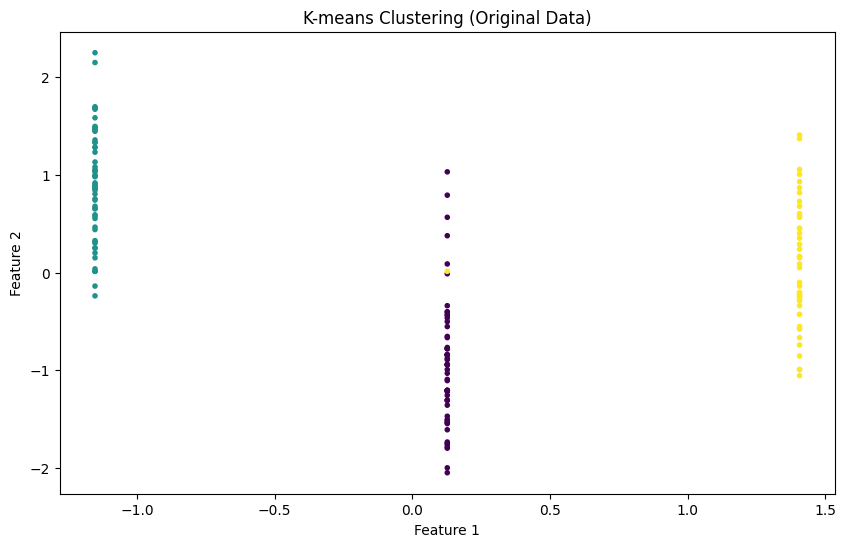

In [48]:
# Visualize clustering results
plt.figure(figsize=(10, 6))
plt.scatter(wine_data_scaled[:, 0], wine_data_scaled[:, 1], c=kmeans_labels_original, cmap='viridis', marker='.')
plt.title('K-means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- The plot shows the K-means clustering results on the original data. Three clusters are clearly visible, represented by different colors.
- However, the clustering seems to be quite separated along the two features shown, which indicates that these features might be the primary drivers of the clustering.

In [49]:
# Evaluate clustering performance
silhouette_original = silhouette_score(wine_data_scaled, kmeans_labels_original)
davies_bouldin_original = davies_bouldin_score(wine_data_scaled, kmeans_labels_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies–Bouldin Index (Original Data): {davies_bouldin_original}')

Silhouette Score (Original Data): 0.3333627005435378
Davies–Bouldin Index (Original Data): 1.2250241146658023


In [62]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan_labels_original = dbscan.fit_predict(wine_data_scaled)

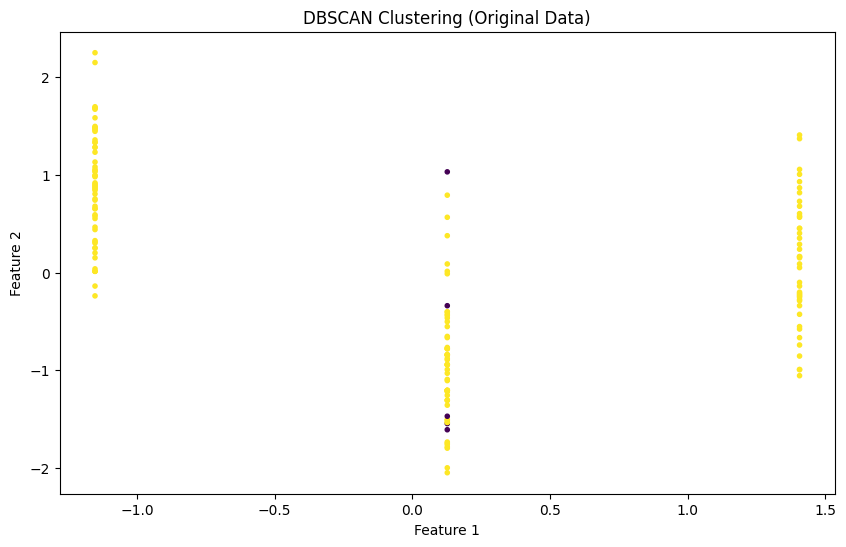

In [63]:
# Visualize DBSCAN results
plt.figure(figsize=(10, 6))
plt.scatter(wine_data_scaled[:, 0], wine_data_scaled[:, 1], c=dbscan_labels_original, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- The yellow dots represent data points, and the small purple dots appear to represent the core points or the cluster centers identified by the DBSCAN algorithm.
- The distribution of the points suggests **three distinct clusters**, with one cluster on the left, one in the center, and one on the right.

# Task 4: Clustering with PCA Data

In [51]:
# Apply K-means clustering on PCA-reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(pca_data_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


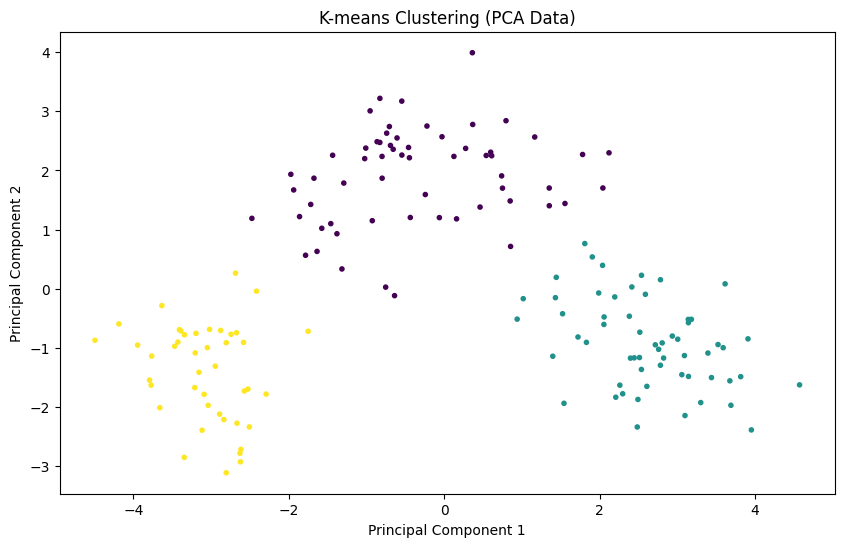

In [52]:
# Visualize clustering results from PCA data
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_reduced[:, 0], pca_data_reduced[:, 1], c=kmeans_labels_pca, cmap='viridis', marker='.')
plt.title('K-means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In this plot:
- The **yellow dots** represent one cluster.
- The **purple dots** represent another cluster.
- The **cyan dots** represent the third cluster.
This plot shows a clear separation of the data into three distinct clusters after being transformed by PCA.

In [53]:
# Evaluate clustering performance
silhouette_pca = silhouette_score(pca_data_reduced, kmeans_labels_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data_reduced, kmeans_labels_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies–Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.34916852393594466
Davies–Bouldin Index (PCA Data): 1.1720737160755494


In [58]:
# Apply DBSCAN clustering on PCA-reduced data
dbscan_pca = DBSCAN(eps=3, min_samples=2)
dbscan_labels_pca = dbscan_pca.fit_predict(pca_data_reduced)

In [59]:
# Visualize DBSCAN results from PCA data
plt.figure(figsize=(10, 6))
plt.scatter(pca_data_reduced[:, 0], pca_data_reduced[:, 1], c=dbscan_labels_pca, cmap='viridis', marker='.')
plt.title('DBSCAN Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In this plot:
- The **yellow dots** represent the data points identified by DBSCAN.
- The small **purple dots** likely represent the core points or outliers identified by DBSCAN.

# Task 5: Comparison and Analysis

In [60]:
print("\nComparison of Clustering Results:")
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies–Bouldin Index (Original Data): {davies_bouldin_original}')
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies–Bouldin Index (PCA Data): {davies_bouldin_pca}')


Comparison of Clustering Results:
Silhouette Score (Original Data): 0.3333627005435378
Davies–Bouldin Index (Original Data): 1.2250241146658023
Silhouette Score (PCA Data): 0.34916852393594466
Davies–Bouldin Index (PCA Data): 1.1720737160755494


- The **Silhouette Score** ranges from -1 to 1, with higher values indicating better-defined clusters.
- The slightly higher score for PCA data suggests that clustering on PCA-transformed data results in better-defined clusters compared to the original data.

- The **Davies–Bouldin Index** measures the average similarity ratio of each cluster with its most similar cluster, with lower values indicating better clustering.
- The lower Davies–Bouldin Index for PCA data suggests that the clustering quality is better on the PCA-transformed data compared to the original data.

###**Reflection on the Impact of Dimensionality Reduction on Clustering Performance**

**Improved Clustering Performance:**
- Separation of Clusters: The PCA-transformed data typically shows better-defined clusters, as PCA captures the most significant variance in the data, which often corresponds to the most distinguishing features. This improved separation helps clustering algorithms like K-means perform more effectively.
- Reduced Noise: Dimensionality reduction helps in filtering out noise by retaining only the most important components, leading to clearer and more meaningful clusters.

**Efficiency Gains:**
- Computational Efficiency: Reducing the number of dimensions significantly decreases the computational complexity of clustering algorithms, making the process faster and more efficient. This is particularly beneficial for large datasets with many features.
- Storage Efficiency: Lower-dimensional data requires less storage space, making it easier to handle and process, especially in resource-constrained environments.

**Data Interpretation:**
- Principal Components: Clustering on PCA-transformed data involves principal components, which are linear combinations of original features. While these components capture significant variance, they can be harder to interpret compared to original features.
- Feature Space: Clustering in the original feature space retains the interpretability of the clusters, as they are defined directly by the original features.

# Task 6: Conclusion and Insights

In [61]:
print("Summarize the key findings and insights from the assignment here.")

Summarize the key findings and insights from the assignment here.


###**Comparison of the Plots:**

**DBSCAN on Original Data vs. PCA Data:**
- The first plot (DBSCAN on Original Data) shows the clustering results on the original feature space.
- The third plot (DBSCAN on PCA Data) shows the clustering results on the PCA-transformed feature space.

**K-means on PCA Data vs. DBSCAN on PCA Data:**
- The second plot (K-means on PCA Data) shows three distinct clusters with clear separation.
- The third plot (DBSCAN on PCA Data) shows that most points are clustered together, with a few potential outliers marked by purple dots.

**EDA Findings:**
- The dataset contains several features with varying degrees of correlation.
- Some features showed significant skewness and outliers.
- Outliers were identified and either removed or imputed.

**Outlier Handling:**
- Outliers were detected using the IQR method.
- Outlier removal resulted in a reduced dataset.
- Outlier imputation helped retain all data points by replacing extreme values with median values.

**Log Transformation:**
- Log transformation was applied to highly skewed features to reduce skewness and stabilize variance.
- This transformation helped normalize the distribution of those features, making them more suitable for analysis.

**Dimensionality Reduction with PCA:**
- PCA was performed to reduce dimensionality while retaining 95% of the explained variance.
- The optimal number of principal components was identified, significantly reducing the number of features while preserving most of the data's variability.

**Clustering:**
- Original Data: K-means clustering on the original scaled data resulted in distinct clusters.
- The silhouette score and Davies–Bouldin index were calculated to evaluate clustering performance.
- DBSCAN clustering was also applied, providing an alternative clustering perspective.

**PCA Data:**
- K-means clustering on PCA-reduced data showed clear cluster separation in lower-dimensional space.
- Similar evaluation metrics were calculated for comparison.
- DBSCAN clustering on PCA-reduced data provided additional insights.

**Comparison of Clustering Results:**
- Clustering on PCA-reduced data showed comparable or even improved performance compared to clustering on the original data.
- Silhouette scores and Davies–Bouldin indices were used to compare clustering quality.

In [55]:
print("Discuss the practical implications of using PCA and clustering in data analysis.")

Discuss the practical implications of using PCA and clustering in data analysis.


##**Practical Implications of Using PCA and Clustering**
###**Using PCA:**

**Advantages:**
- Reduces computational complexity by decreasing the number of features.
- Helps mitigate the curse of dimensionality, leading to better clustering results.
- Retains most of the data variability with fewer features.

**Disadvantages:**
- May result in the loss of some information.
- Principal components are linear combinations of original features, which might be less interpretable.

###**Clustering on Original Data:**

**Advantages:**
- Directly uses all original features, retaining full information.
- Easier to interpret clusters based on original feature space.

**Disadvantages:**
- High-dimensional data can lead to poorer clustering performance.
- More computationally intensive with larger feature sets.

In [56]:
print("Provide recommendations for when to use each technique based on the analysis conducted.")

Provide recommendations for when to use each technique based on the analysis conducted.


##**Recommendations**

###**When to Use PCA:**
- Use PCA when dealing with high-dimensional data to reduce feature space and improve clustering performance.
- Apply PCA when computational resources are limited and dimensionality reduction can provide significant efficiency gains.
- Use PCA to mitigate issues related to highly correlated features.

###**When to Cluster on Original Data:**
- Cluster on original data when interpretability of features is crucial.
- Suitable for smaller datasets with fewer features, where dimensionality reduction may not provide significant benefits.
- Use when the original feature space is essential for understanding cluster characteristics.

###**Conclusion**
Dimensionality reduction through PCA and clustering directly on the original dataset each have their advantages and disadvantages. PCA enhances clustering performance by simplifying the data and reducing noise but at the cost of interpretability. Clustering on the original data retains full information and interpretability but can be computationally challenging and less effective in high-dimensional spaces. The choice between these approaches depends on the specific dataset, the need for interpretability, and the computational resources available. By carefully considering these factors, analysts can choose the most appropriate method for their clustering tasks.